In [5]:
import pandas as pd
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
routes = pd.read_csv("routes.csv")
print(airlines.iloc[0])
print(airports.iloc[0])
print(routes.iloc[0])

id                       1
name        Private flight
alias                   \N
iata                     -
icao                   NaN
callsign               NaN
country                NaN
active                   Y
Name: 0, dtype: object
id                              1
name                       Goroka
city                       Goroka
country          Papua New Guinea
code                          GKA
icao                         AYGA
latitude                 -6.08169
longitude                 145.392
altitude                     5282
offset                         10
dst                             U
timezone     Pacific/Port_Moresby
Name: 0, dtype: object
airline         2B
airline_id     410
source         AER
source_id     2965
dest           KZN
dest_id       2990
codeshare      NaN
stops            0
equipment      CR2
Name: 0, dtype: object


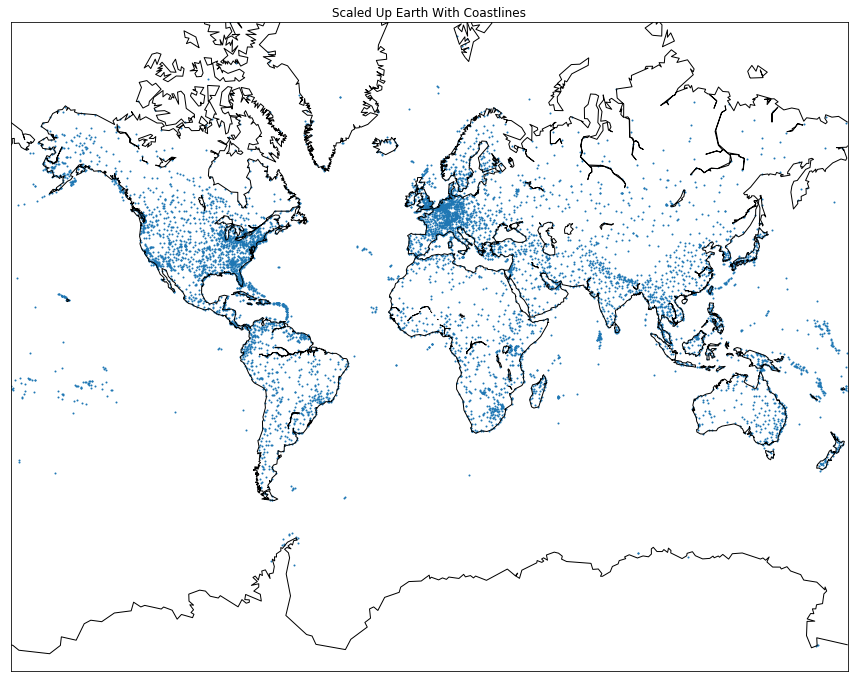

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
fig,ax = plt.subplots(figsize=(15,20))
ax.set_title("Scaled Up Earth With Coastlines")
m = Basemap(projection="merc",llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180)
longitude = airports["longitude"].tolist()
latitude = airports["latitude"].tolist()
x,y=m(longitude,latitude)
m.scatter(x,y,s=1) # s is marker size
m.drawcoastlines()

In [22]:
geo_routes = pd.read_csv("geo_routes.csv")
geo_routes.info()
geo_routes.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB


,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
0,2B,AER,KZN,CR2,39.956589,49.278728,43.449928,55.606186
1,2B,ASF,KZN,CR2,48.006278,49.278728,46.283333,55.606186
2,2B,ASF,MRV,CR2,48.006278,43.081889,46.283333,44.225072
3,2B,CEK,KZN,CR2,61.503333,49.278728,55.305836,55.606186
4,2B,CEK,OVB,CR2,61.503333,82.650656,55.305836,55.012622


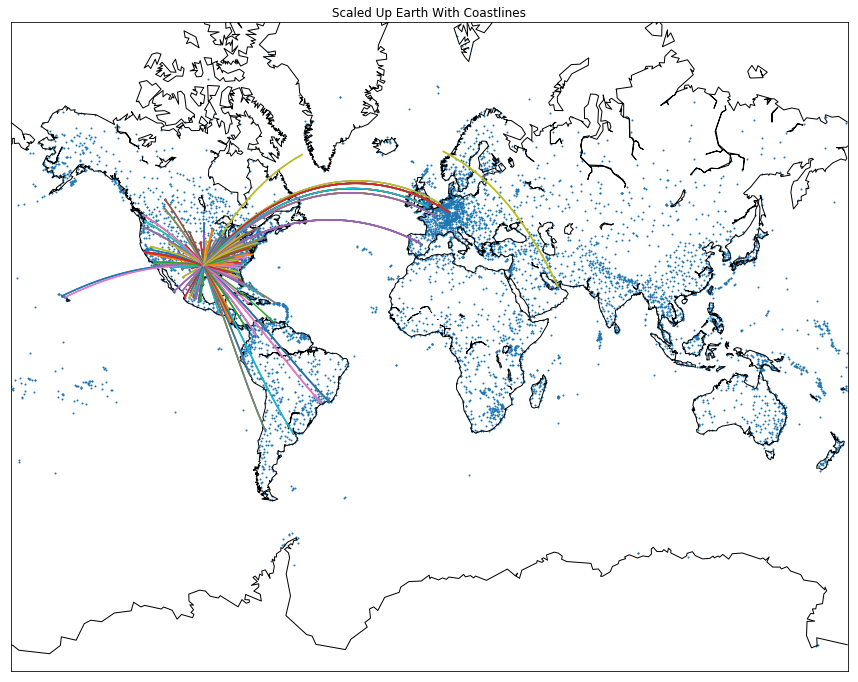

In [34]:
fig,ax = plt.subplots(figsize=(15,20))
ax.set_title("Scaled Up Earth With Coastlines")
m = Basemap(projection="merc",llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180)
longitude = airports["longitude"].tolist()
latitude = airports["latitude"].tolist()
x,y=m(longitude,latitude)
m.scatter(x,y,s=1) # s is marker size
m.drawcoastlines()

def create_great_circles(routes):
    for index,row in routes.iterrows():
        lon1,lat1 = row["start_lon"],row["start_lat"]
        lon2,lat2 = row["end_lon"],row["end_lat"]
        if abs(lon1-lon2)<180: #Cannot handle situations in which the great circle intersects the edge of the map projection domain, and then re-enters the domain.
            if abs(lat1-lat2)<180:
                m.drawgreatcircle(lon1,lat1,lon2,lat2)
dfw = geo_routes[geo_routes["source"]=="DFW"]
create_great_circles(dfw)
            
    

# Next Step
In this mission, we learned how to visualize geographic data using basemap. This is the last mission in the Storytelling Through Data Visualization course. You should now have a solid foundation in data visualization for exploring data and communicating insights. We encourage you to keep exploring data visualization on your own. Here are some suggestions for what to do next:

Plotting tools:

Creating 3D plots using Plotly: https://plot.ly/python/3d-scatter-plots/

Creating interactive visualizations using bokeh: http://bokeh.pydata.org/en/latest/

Creating interactive map visualizations using folium

The art and science of data visualization:
Visual Display of Quantitative Information

Visual Explanations: Images and Quantities, Evidence and Narrative